# Communicate Data Findings for the dataset Ford Go Bike
## by Robert Garcia Ventura

## Investigation Overview

In this inverstigation, I want to look at the differen characteristics of type of users and how the company can increase the amount of subscribers. I would like to know if there is some station in where the amount of the type of user `Customer` is using this service more than the type of user `Subscriber`. This can be seen as an oportunity to promote this service more in the area of this stations in where the company can increase the amount of subscribers.

## Dataset Overview

The data includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data is from 2017 until April 2019. The total amount of data is 3,254,325 rides.

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import requests
import json
import zipfile
import os
import seaborn as sns
import calendar

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Read the data already cleaned in the exploration report
bike_data = pd.read_csv('bike_data_clean.csv')

## Types of users

In this dataset there are 2 types of users (`Subscriber` and `Customer`). In most of the cases (84,5%) the user is `Subscriber` and the rest (15,5%) the user is `Customer`.

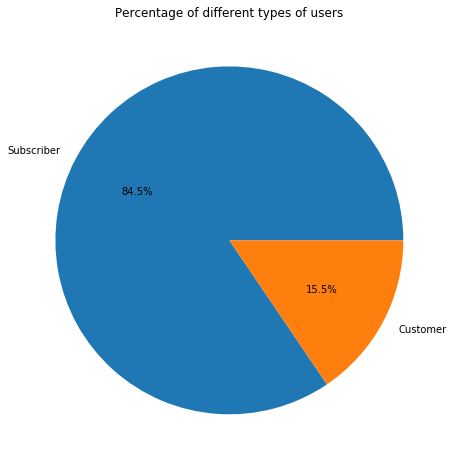

In [3]:
# Create a pie plot with the different percentages of users
bike_data.user_type.value_counts().plot.pie(autopct='%1.1f%%', figsize=(8,8));
plt.title('Percentage of different types of users')
plt.ylabel('')
plt.show()

## Types of user per month

As we can see from the data of the year 2018, the amount of customers and subscribers increase during the summer and then it decrease on the winter. In the case of the subscribers, we can see an increment in `October` but actually it looks like it should be a decrease, so this is also interesting to take into account.

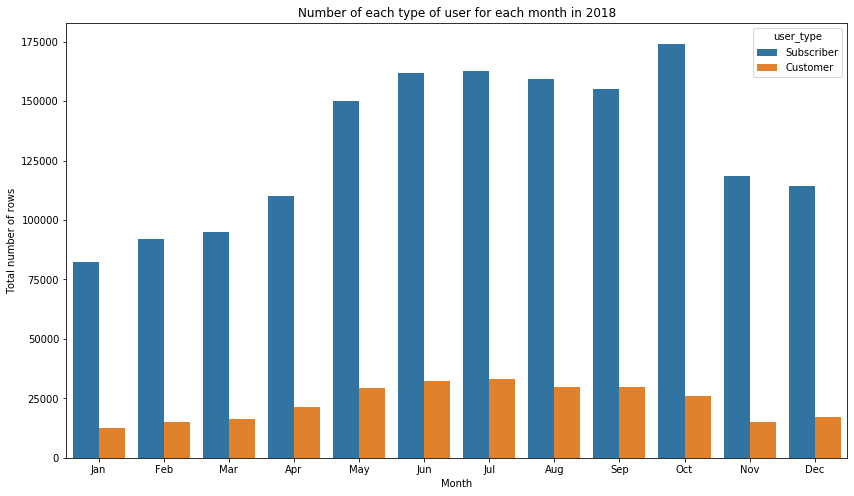

In [4]:
# Plot a countplot using the library Seaborn
plt.figure(figsize=(14,8));
sns.countplot(data = bike_data.query('start_year == 2018'), x = 'start_month_name', hue = 'user_type');
plt.xlabel('Month');
plt.ylabel('Total number of rows');
plt.title('Number of each type of user for each month in 2018');
plt.show()

## Start and ends of the rides for each type of user

We can see that in the case of the users `Subscriber` there is a high demand at 8-9 am and then at 5-6 pm. Basically when the people start and end of the work. In the case of the users `Customer` we can not see this difference in the morning and afternoon, and we can only appreciate that in the afternoon it looks like there is more demand around 5pm.

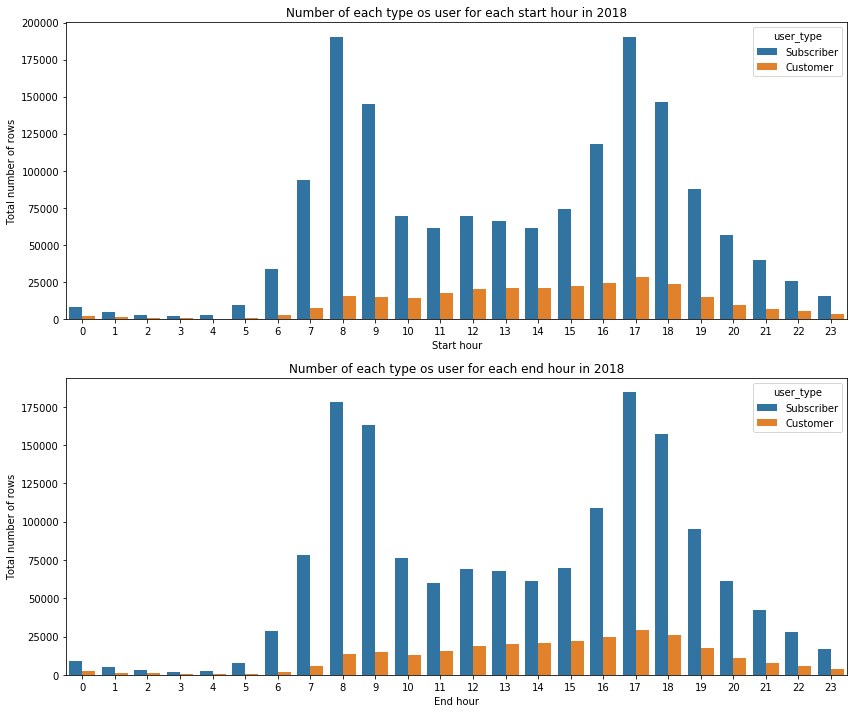

In [5]:
# Plot a countplot using the library Seaborn
fig, ax = plt.subplots(nrows=2, figsize = [14,12])
sns.countplot(data = bike_data.query('start_year == 2018'), x = 'start_hour', hue = 'user_type', ax = ax[0]);
sns.countplot(data = bike_data.query('start_year == 2018'), x = 'end_hour', hue = 'user_type', ax = ax[1]);
ax[0].set_xlabel('Start hour');
ax[0].set_ylabel('Total number of rows');
ax[0].set_title('Number of each type os user for each start hour in 2018');
ax[1].set_xlabel('End hour');
ax[1].set_ylabel('Total number of rows');
ax[1].set_title('Number of each type os user for each end hour in 2018');
plt.show()

## Stations with more customers instead of subscribers

In this case I found that there are 3 stations in where the number of rides made by customers it was higher compared to the subscribers. In this stations, I think the company should study to do a marketing campain or some promotions to try to increase the amount of subscribers in this stations.

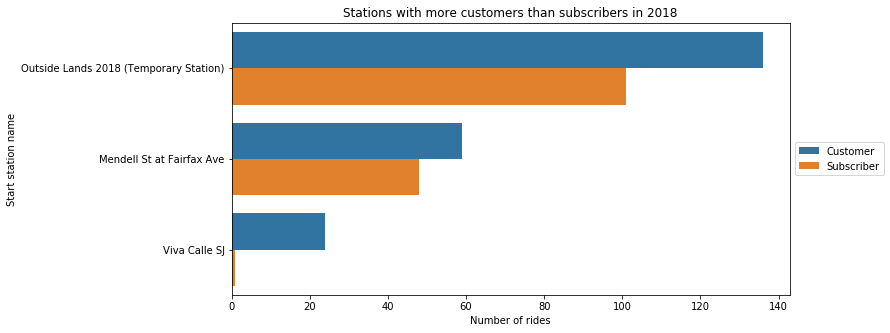

In [6]:
# Count the number of start rides in each station in 2018 for each type of customer
df = bike_data.query('start_year == 2018').groupby(['start_station_id', 'user_type'])['bike_id'].count().reset_index()

# Pivote the dataframe to put each type of user in a column
df = df.pivot(index='start_station_id',columns='user_type').reset_index()

# Calculate the stations in where the amount of customers is higher than the subscribers
df['more_customers'] = df.bike_id.Customer > df.bike_id.Subscriber

# Save the list with the stations id with more customers than subscribers
list_stations_more_customers = df[df.more_customers].start_station_id

plt.figure(figsize=(10, 5));
sns.countplot(data=bike_data.query('(start_year == 2018) and (start_station_id in @list_stations_more_customers)'),\
              y='start_station_name', hue='user_type');
plt.legend(loc='center left', bbox_to_anchor=(1,0.5));
plt.title('Stations with more customers than subscribers in 2018');
plt.ylabel('Start station name');
plt.xlabel('Number of rides');